### 10 minutes to Pandas

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

```mySeries = pd.Series(data, index=index)
```

Syntax for declaring a Series object

Here, data can be many different things:

- a Python dict
- an ndarray
- a scalar value (like 5)
The passed index is a list of axis labels. Thus, this separates into a few cases depending on what data is

#### From ndarray

If data is an ndarray, index must be the same length as data. If no index is passed, one will be created having values [0, ..., len(data) - 1]

In [3]:
s = pd.Series(np.random.randn(5), index=['a','b','c','d','e'])

print s

print s.index

print pd.Series(np.random.randn(5))

a   -0.168104
b   -2.389233
c   -0.068134
d   -0.256722
e   -1.163783
dtype: float64
Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')
0    0.778962
1    0.096306
2    0.462687
3    0.311744
4   -0.535912
dtype: float64


#### From dict

If data is a dict, if index is passed the values in data corresponding to the labels in the index will be pulled out. Otherwise, an index will be constructed from the sorted keys of the dict, if possible.

In [4]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}

print pd.Series(d)

print pd.Series(d, index=['b', 'c', 'd', 'a'])

a    0.0
b    1.0
c    2.0
dtype: float64
b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


** Note NaN (not a number) is the standard missing data marker used in pandas **

#### From scalar value
If data is a scalar value, an index must be provided. The value will be repeated to match the length of index

In [5]:
pd.Series(5., index=['a', 'b', 'c'])

a    5.0
b    5.0
c    5.0
dtype: float64

Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, things like slicing also slice the index.

In [6]:
print s
print s[0]
print s[:3]

print s.median()

print s > s.median()

print s[s > s.median()]

print s[[4,3,1]]


a   -0.168104
b   -2.389233
c   -0.068134
d   -0.256722
e   -1.163783
dtype: float64
-0.168103742236
a   -0.168104
b   -2.389233
c   -0.068134
dtype: float64
-0.256722296736
a     True
b    False
c     True
d    False
e    False
dtype: bool
a   -0.168104
c   -0.068134
dtype: float64
e   -1.163783
d   -0.256722
b   -2.389233
dtype: float64


A Series is like a fixed-size dict in that you can get and set values by index label:

In [7]:
print s['a']

s['e'] = 100

print s

print 'e' in s

-0.168103742236
a     -0.168104
b     -2.389233
c     -0.068134
d     -0.256722
e    100.000000
dtype: float64
True


Using the get method, a missing label will return None or specified default:

In [8]:
print s.get('f')

# if not found return -1
print s.get('f', -1)

print s.get('f', np.nan)

None
-1
nan


### Vectorized operations and label alignment with Series

When doing data analysis, as with raw NumPy arrays looping through Series value-by-value is usually not necessary. Series can also be passed into most NumPy methods expecting an ndarray.

In [9]:
print s+s

print s*2


a     -0.336207
b     -4.778466
c     -0.136267
d     -0.513445
e    200.000000
dtype: float64
a     -0.336207
b     -4.778466
c     -0.136267
d     -0.513445
e    200.000000
dtype: float64


A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [10]:
print s[1:]

print s[:-1]

print s[1:] + s[:-1]

b     -2.389233
c     -0.068134
d     -0.256722
e    100.000000
dtype: float64
a   -0.168104
b   -2.389233
c   -0.068134
d   -0.256722
dtype: float64
a         NaN
b   -4.778466
c   -0.136267
d   -0.513445
e         NaN
dtype: float64


The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

#### Name attr

Series can also have a name attribute:

In [11]:
s = pd.Series(np.random.randn(5), name="something")
print s

# renaming a series
s2 = s.rename("different")
print s2

0   -0.348256
1   -0.185908
2   -1.931755
3    0.193543
4   -1.417087
Name: something, dtype: float64
0   -0.348256
1   -0.185908
2   -1.931755
3    0.193543
4   -1.417087
Name: different, dtype: float64


### Data Frame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a **dict of Series objects**. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

1. Dict of 1D ndarrays, lists, dicts or Series
2. 2-D numpy.ndarray
3. Structured or record ndarray
4. A Series

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

#### From dict of Series or dicts

The result index will be the union of the indexes of the various Series. If there are any nested dicts, these will be first converted to Series. If no columns are passed, the columns will be the sorted list of dict keys.

In [12]:
d = {'one': pd.Series([1,2,3], index=['a', 'b', 'c']), 'two': pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)

print df

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


#### The row and cols of a DataFrame can be accessed by index and column attr resp

In [13]:
print pd.DataFrame(d, index=['d', 'b', 'a'])

# there is no col 'three' hence returns NaNs
print pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

print df.index

print df.columns

   one  two
d  NaN    4
b  2.0    2
a  1.0    1
   two three
d    4   NaN
b    2   NaN
a    1   NaN
Index([u'a', u'b', u'c', u'd'], dtype='object')
Index([u'one', u'two'], dtype='object')


#### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [14]:
d = {
    'one': [1, 2, 3, 4],
    'two': [4, 3, 2, 1]
}

print pd.DataFrame(d)

print pd.DataFrame(d, index=['a','b','c','d'])

   one  two
0    1    4
1    2    3
2    3    2
3    4    1
   one  two
a    1    4
b    2    3
c    3    2
d    4    1


#### From a list of dicts

In [15]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

print pd.DataFrame(data2)

print pd.DataFrame(data2, index=['first', 'second'])

print pd.DataFrame(data2, columns = ['a', 'b'])

   a   b     c
0  1   2   NaN
1  5  10  20.0
        a   b     c
first   1   2   NaN
second  5  10  20.0
   a   b
0  1   2
1  5  10


#### DataFrame from items

DataFrame.from_items works analogously to the form of the dict constructor that takes a sequence of (key, value) pairs, where the keys are column (or row, in the case of orient='index') names, and the value are the column values (or row values). This can be useful for constructing a DataFrame with the columns in a particular order without having to pass an explicit list of columns:

In [16]:
print pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [5, 6, 7])], orient='columns')

# If you pass orient='index', the keys will be the row labels. But in this case you must also pass the desired column names

print pd.DataFrame.from_items([('A', [1, 5]), ('B', [2, 6]), ('C', [3, 7])], orient='index', columns=[1, 2])

   A  B
0  1  5
1  2  6
2  3  7
   1  2
A  1  5
B  2  6
C  3  7


#### Simple operations on DataFrames: Column selection, addition, deletion

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [17]:
print df

print df['one']

df['three'] = df['one'] * df['two']

print df

df['flag'] = df['one'] > 2

print df


   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4
a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64
   one  two  three
a  1.0    1    1.0
b  2.0    2    4.0
c  3.0    3    9.0
d  NaN    4    NaN
   one  two  three   flag
a  1.0    1    1.0  False
b  2.0    2    4.0  False
c  3.0    3    9.0   True
d  NaN    4    NaN  False


Columns can be deleted or popped like with a dict

In [18]:
# del df['three']

df['three'] = df['one'] * df['two']
print df

# pop deletes and returns the column
three = df.pop('three')

print three

   one  two  three   flag
a  1.0    1    1.0  False
b  2.0    2    4.0  False
c  3.0    3    9.0   True
d  NaN    4    NaN  False
a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64


** When inserting a scalar value, it will naturally be propagated to fill the column: **

In [19]:
df['foo'] = 'bar'

print df

   one  two   flag  foo
a  1.0    1  False  bar
b  2.0    2  False  bar
c  3.0    3   True  bar
d  NaN    4  False  bar


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [20]:
print df['one'][:2]

df['one_truncated'] = df['one'][:2]
print df

a    1.0
b    2.0
Name: one, dtype: float64
   one  two   flag  foo  one_truncated
a  1.0    1  False  bar            1.0
b  2.0    2  False  bar            2.0
c  3.0    3   True  bar            NaN
d  NaN    4  False  bar            NaN


#### Assigning New Columns in Method Chains

Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [21]:
# read in the iris dataset

iris = pd.read_csv('data/iris.csv')

print iris.head()

# mutate a new column

iris.assign(sepal_ratio = iris['sepal_width']/iris['sepal_length']).head()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


Above was an example of inserting a precomputed value. We can also pass in a function of one argument to be evalutated on the DataFrame being assigned to.

In [22]:
iris.assign(sepal_ratio = lambda x: (x['sepal_width'])/x['sepal_length']).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


**assign always returns a copy of the data, leaving the original DataFrame untouched.**

In [23]:
iris.head()

# original data unchanged

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign in chains of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

Populating the interactive namespace from numpy and matplotlib
     sepal_length  sepal_width  petal_length  petal_width    species
105           7.6          3.0           6.6          2.1  virginica
107           7.3          2.9           6.3          1.8  virginica
109           7.2          3.6           6.1          2.5  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
135           7.7          3.0           6.1          2.3  virginica


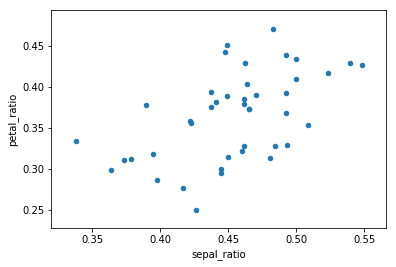

In [24]:
# . query(): like subset

%pylab inline

print iris.query('petal_length > 6')

iris.query('petal_length > 5').assign(sepal_ratio = lambda x: x.sepal_width/x.sepal_length,
                                     petal_ratio = lambda x: x.petal_width/x.petal_length).plot(kind = 'scatter', x = 'sepal_ratio', y = 'petal_ratio')


** Warning: All expressions are computed first, and then assigned. So you can’t refer to another column being assigned in the same call to assign. For example: **

```

In [74]: # Don't do this, bad reference to `C`
        df.assign(C = lambda x: x['A'] + x['B'],
                  D = lambda x: x['A'] + x['C'])
In [2]: # Instead, break it into two assigns
        (df.assign(C = lambda x: x['A'] + x['B'])
           .assign(D = lambda x: x['A'] + x['C']))
```

### Indexing/Selection

1. Selecting column: df[col]: Series
2. Select row by label: df.loc[label]: Series
3. Select row by int location: df.iloc[loc]: Series
4. Slice rows: df[5:10]: DataFrame
5. Select rows by Boolean Vector(like in R): df[bool_vector]: DataFrame

Row selection, for example, returns a Series whose index is the columns of the DataFrame:

In [25]:
print df

print df.loc['b']

print df.iloc[1]

one_row = df.loc['b']

# simple loop
for value in one_row:
    print value


   one  two   flag  foo  one_truncated
a  1.0    1  False  bar            1.0
b  2.0    2  False  bar            2.0
c  3.0    3   True  bar            NaN
d  NaN    4  False  bar            NaN
one                  2
two                  2
flag             False
foo                bar
one_truncated        2
Name: b, dtype: object
one                  2
two                  2
flag             False
foo                bar
one_truncated        2
Name: b, dtype: object
2.0
2
False
bar
2.0


### Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [26]:
# (10, 4) => 10 rows and 4 cols
df = pd.DataFrame(np.random.randn(10, 4), columns=['A','B','C','D'])

df1 = pd.DataFrame(np.random.randn(7, 3), columns=['A','B','C'])

print df

print df1

print df + df1

# When doing an operation between DataFrame and Series, the default behavior is to align the Series index
# on the DataFrame columns, thus broadcasting row-wise. For example:

print df.iloc[0]

print df - df.iloc[0]



          A         B         C         D
0  0.801770 -0.355041 -1.162588 -0.894311
1 -0.257183  0.216568 -0.561696  2.036322
2  0.924441  0.427542 -0.792020 -0.228610
3 -0.191478 -1.390070 -0.624033  0.245334
4  1.141935 -0.567868  0.315117 -1.249413
5 -0.737217 -1.106826  1.140565 -0.973535
6  1.783901  0.712680  0.940254 -1.227623
7 -0.041232 -0.730511  1.725145 -0.433156
8  0.149646 -0.233690 -0.980051 -0.169800
9  0.733837  0.322426 -0.504589 -0.295560
          A         B         C
0  0.512376  0.253829 -0.463392
1 -1.030561  1.105163 -0.421803
2  0.023840  0.739403  0.016641
3 -0.277735 -0.953534 -1.312835
4  0.535370  0.612479  0.408387
5  0.898166  0.544328 -1.306410
6 -0.609311 -0.642300 -0.154400
          A         B         C   D
0  1.314147 -0.101212 -1.625981 NaN
1 -1.287744  1.321730 -0.983500 NaN
2  0.948280  1.166944 -0.775379 NaN
3 -0.469214 -2.343604 -1.936868 NaN
4  1.677305  0.044610  0.723504 NaN
5  0.160950 -0.562498 -0.165846 NaN
6  1.174590  0.070380  0.78585

In the special case of working with time series data, and the DataFrame index also contains dates, the broadcasting will be column-wise:

In [27]:
index = pd.date_range("1/1/2000", periods=8)

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))

print df

                   A         B         C
2000-01-01 -2.578253  1.694160 -0.831198
2000-01-02 -0.244163 -1.215260  1.947973
2000-01-03  0.045129 -0.350518  0.410453
2000-01-04  0.172836  1.750736  0.989039
2000-01-05 -1.538526 -0.953325 -0.193850
2000-01-06 -1.917456  1.260267  0.815350
2000-01-07 -0.413516 -1.130264  0.133197
2000-01-08  2.007004 -0.383707  0.499046


Operations with scalars are as expected

In [28]:
print "df:", df

print "df*2 + 5", df*2 + 5

print "1/df", 1/df

df:                    A         B         C
2000-01-01 -2.578253  1.694160 -0.831198
2000-01-02 -0.244163 -1.215260  1.947973
2000-01-03  0.045129 -0.350518  0.410453
2000-01-04  0.172836  1.750736  0.989039
2000-01-05 -1.538526 -0.953325 -0.193850
2000-01-06 -1.917456  1.260267  0.815350
2000-01-07 -0.413516 -1.130264  0.133197
2000-01-08  2.007004 -0.383707  0.499046
df*2 + 5                    A         B         C
2000-01-01 -0.156505  8.388319  3.337603
2000-01-02  4.511674  2.569479  8.895946
2000-01-03  5.090259  4.298965  5.820906
2000-01-04  5.345672  8.501472  6.978078
2000-01-05  1.922948  3.093350  4.612301
2000-01-06  1.165088  7.520533  6.630700
2000-01-07  4.172967  2.739472  5.266393
2000-01-08  9.014009  4.232585  5.998092
1/df                     A         B         C
2000-01-01  -0.387860  0.590263 -1.203082
2000-01-02  -4.095621 -0.822869  0.513354
2000-01-03  22.158519 -2.852923  2.436332
2000-01-04   5.785840  0.571188  1.011083
2000-01-05  -0.649973 -1.048960 -5

#### Boolean Operators

In [29]:
df1 = pd.DataFrame({'a': [1, 0, 1], 'b': [0, 1, 1]}, dtype=bool)

df2 = pd.DataFrame({'a': [0, 1, 1], 'b': [1, 1, 0]}, dtype=bool)

print df1

print df2

# print df1 & df2

# print df1 | df2

# print df1 ^ df2

print -df1

       a      b
0   True  False
1  False   True
2   True   True
       a      b
0  False   True
1   True   True
2   True  False
       a      b
0  False   True
1   True  False
2  False  False


#### Transposing and Data Interportability

To transpose, access the T attribute (also the transpose function), similar to an ndarray:

Elementwise NumPy ufuncs (log, exp, sqrt, ...) and various other NumPy functions can be used with no issues on DataFrame, assuming the data within are numeric:

In [30]:
print df[:5]

print df[:5].T

print np.exp(df)

# convert DataFrame to list

print np.asarray(df)

                   A         B         C
2000-01-01 -2.578253  1.694160 -0.831198
2000-01-02 -0.244163 -1.215260  1.947973
2000-01-03  0.045129 -0.350518  0.410453
2000-01-04  0.172836  1.750736  0.989039
2000-01-05 -1.538526 -0.953325 -0.193850
   2000-01-01  2000-01-02  2000-01-03  2000-01-04  2000-01-05
A   -2.578253   -0.244163    0.045129    0.172836   -1.538526
B    1.694160   -1.215260   -0.350518    1.750736   -0.953325
C   -0.831198    1.947973    0.410453    0.989039   -0.193850
                   A         B         C
2000-01-01  0.075907  5.442070  0.435527
2000-01-02  0.783360  0.296633  7.014454
2000-01-03  1.046163  0.704323  1.507501
2000-01-04  1.188671  5.758840  2.688649
2000-01-05  0.214697  0.385457  0.823782
2000-01-06  0.146980  3.526361  2.259967
2000-01-07  0.661321  0.322948  1.142475
2000-01-08  7.440993  0.681331  1.647149
[[-2.57825255  1.69415955 -0.8311984 ]
 [-0.2441632  -1.21526025  1.94797293]
 [ 0.04512937 -0.35051771  0.41045307]
 [ 0.17283575  1.750

The dot method on DataFrame implements matrix multiplication:

In [31]:
df.T.dot(df)

,A,B,C
A,16.981672,-5.036989,1.538234
B,-5.036989,11.456801,-1.317477
C,1.538234,-1.317477,6.601320


Similarly, the dot method on Series implements dot product:

In [32]:
print np.arange(5,10)

s1 = pd.Series(np.arange(5,10))
print s1

s1.dot(s1)

[5 6 7 8 9]
0    5
1    6
2    7
3    8
4    9
dtype: int32


255

#### Console Display

Very large DataFrames will be truncated to display them in the console. You can also get a summary using info(). 

```
In [101]: baseball = pd.read_csv('data/baseball.csv')

In [102]: print(baseball)
       id     player  year  stint  ...   hbp   sh   sf  gidp
0   88641  womacto01  2006      2  ...   0.0  3.0  0.0   0.0
1   88643  schilcu01  2006      1  ...   0.0  0.0  0.0   0.0
..    ...        ...   ...    ...  ...   ...  ...  ...   ...
98  89533   aloumo01  2007      1  ...   2.0  0.0  3.0  13.0
99  89534  alomasa02  2007      1  ...   0.0  0.0  0.0   0.0

[100 rows x 23 columns]

In [103]: baseball.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
id        100 non-null int64
player    100 non-null object
year      100 non-null int64
stint     100 non-null int64
team      100 non-null object
lg        100 non-null object
g         100 non-null int64
```

#### Displaying DataFrames nicely

In [33]:
# Wide DataFrames will be printed across multiple rows by default:

print pd.DataFrame(np.random.randn(3, 12))

# You can change how much to print on a single row by setting the display.width option:

pd.set_option('display.width', 40) # default is 80

print pd.DataFrame(np.random.randn(3, 12))


         0         1         2         3         4         5         6   \
0 -0.253900  0.584259 -0.312920  0.216819 -1.280112  1.019488 -0.083052   
1 -1.090183 -0.836713 -0.514732  0.694000  1.420232 -1.603953  0.361184   
2 -0.719813 -0.332934 -0.543736  0.777469 -0.804925  0.972089 -0.813853   

         7         8         9         10        11  
0 -0.078532 -0.058901  0.625518 -0.612055  0.997725  
1 -0.515818 -0.579898  0.387976 -1.110649  1.665288  
2  0.322672 -0.789464 -0.354503  0.398030  0.284463  
         0         1         2   \
0 -0.433995 -0.722377  0.680317   
1  0.768410 -0.159551  0.657158   
2 -1.234183 -0.709187 -0.048128   

         3         4         5   \
0 -0.433962  0.638857  0.870519   
1  0.997133 -1.426033  0.502588   
2 -0.250349  1.919674 -1.836926   

         6         7         8   \
0 -0.018669  0.103370 -0.723775   
1 -0.352842  0.496643 -0.170151   
2  0.186906  2.804094 -1.059955   

         9         10        11  
0 -0.492230  0.395028 -0.7

### End of Intro to Data Structures

In [34]:
# Creating a Series

s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

We now want to create a DataFrame by passing a numpy array, with datetime index and labeled columns

In [45]:
# resetting the width

pd.set_option('display.width', 80) 

dates = pd.date_range('20130101', periods=6)

df = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'), index=dates)

print df

                   A         B         C         D
2013-01-01 -0.206753  0.583248 -1.025755  1.287276
2013-01-02 -1.087595  0.256726 -0.463723  0.581591
2013-01-03 -0.884561  0.022692 -0.301526 -1.972375
2013-01-04 -0.625008  0.368609  0.292438 -0.498790
2013-01-05  0.921046  0.327934  1.248494  0.325149
2013-01-06 -1.477962  0.685596 -0.047341 -1.087703


#### A DataFrame may also be created by passing in a dict of objects of various data types

In [36]:
# 1. => it should be a floating type value and not an int

df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})

df2

# print df2.dtypes

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


#### Viewing Data

In [37]:
# print df.head()

# print df.tail(3)

# print df.index

# print df.columns

# print df.values # returns list of lists

# Describe shows a quick statistic summary of your data

df.describe()

# Transpose

# print df.T

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.490696,0.495231,0.113874,0.335393
std,1.229485,1.473172,0.751488,1.195150
min,-1.240949,-1.336863,-1.021985,-1.241219
25%,-0.266121,-0.613088,-0.176114,-0.563333
50%,0.578157,0.811057,0.117393,0.436926
75%,1.225824,1.098448,0.413631,1.292508
max,2.134645,2.579691,1.232015,1.698775


Sorting by axis

In [46]:
print df

print df.sort_index(axis=1, ascending=False)

                   A         B         C         D
2013-01-01 -0.206753  0.583248 -1.025755  1.287276
2013-01-02 -1.087595  0.256726 -0.463723  0.581591
2013-01-03 -0.884561  0.022692 -0.301526 -1.972375
2013-01-04 -0.625008  0.368609  0.292438 -0.498790
2013-01-05  0.921046  0.327934  1.248494  0.325149
2013-01-06 -1.477962  0.685596 -0.047341 -1.087703
                   D         C         B         A
2013-01-01  1.287276 -1.025755  0.583248 -0.206753
2013-01-02  0.581591 -0.463723  0.256726 -1.087595
2013-01-03 -1.972375 -0.301526  0.022692 -0.884561
2013-01-04 -0.498790  0.292438  0.368609 -0.625008
2013-01-05  0.325149  1.248494  0.327934  0.921046
2013-01-06 -1.087703 -0.047341  0.685596 -1.477962


Sorting by values

In [48]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.884561,0.022692,-0.301526,-1.972375
2013-01-02,-1.087595,0.256726,-0.463723,0.581591
2013-01-05,0.921046,0.327934,1.248494,0.325149
2013-01-04,-0.625008,0.368609,0.292438,-0.498790
2013-01-01,-0.206753,0.583248,-1.025755,1.287276
2013-01-06,-1.477962,0.685596,-0.047341,-1.087703


#### Selection

Selecting a single column, which yields a Series, equivalent to ```df.A```


In [47]:
print df['A']

2013-01-01   -0.206753
2013-01-02   -1.087595
2013-01-03   -0.884561
2013-01-04   -0.625008
2013-01-05    0.921046
2013-01-06   -1.477962
Freq: D, Name: A, dtype: float64


Selecting via [], which slices the rows.

In [43]:
print df[0:3]

          A         B         C         D
0  0.119354 -1.336863 -1.021985  1.698775
1 -0.394613  1.184046 -0.250348  0.163927
2  2.134645  2.579691  0.046586 -1.241219


#### Selection using Label

For getting a cross section using a label

In [52]:
print df

# print all cols of row pointed by dates[0]

print df.loc[dates[0]]

# print all rows and only columns: A and B

print df.loc[:, ['A', 'B']]

# print cols B and D pointed by the rows '20130102':'20130104'b

print df.loc['20130102':'20130104', ['B', 'D']]

                   A         B         C         D
2013-01-01 -0.206753  0.583248 -1.025755  1.287276
2013-01-02 -1.087595  0.256726 -0.463723  0.581591
2013-01-03 -0.884561  0.022692 -0.301526 -1.972375
2013-01-04 -0.625008  0.368609  0.292438 -0.498790
2013-01-05  0.921046  0.327934  1.248494  0.325149
2013-01-06 -1.477962  0.685596 -0.047341 -1.087703
A   -0.206753
B    0.583248
C   -1.025755
D    1.287276
Name: 2013-01-01 00:00:00, dtype: float64
                   A         B
2013-01-01 -0.206753  0.583248
2013-01-02 -1.087595  0.256726
2013-01-03 -0.884561  0.022692
2013-01-04 -0.625008  0.368609
2013-01-05  0.921046  0.327934
2013-01-06 -1.477962  0.685596
                   B         D
2013-01-02  0.256726  0.581591
2013-01-03  0.022692 -1.972375
2013-01-04  0.368609 -0.498790


For getting a scalar value


In [55]:
# returns a scalar value

print df.loc[dates[0], 'A']

# returns a DataFrame

print df.loc[dates[0], ['A']]

-0.206752638997
A   -0.206753
Name: 2013-01-01 00:00:00, dtype: float64


#### Selecting by Position

Select via the position of the passed integers

In [58]:
print df

print df.iloc[3]

# By integer slices, acting similar to numpy/python

print df.iloc[3:5, 0:2]

# By lists of integer position locations, similar to the numpy/python style
print df.iloc[3:5,0:2]

                   A         B         C         D
2013-01-01 -0.206753  0.583248 -1.025755  1.287276
2013-01-02 -1.087595  0.256726 -0.463723  0.581591
2013-01-03 -0.884561  0.022692 -0.301526 -1.972375
2013-01-04 -0.625008  0.368609  0.292438 -0.498790
2013-01-05  0.921046  0.327934  1.248494  0.325149
2013-01-06 -1.477962  0.685596 -0.047341 -1.087703
A   -0.625008
B    0.368609
C    0.292438
D   -0.498790
Name: 2013-01-04 00:00:00, dtype: float64
                   A         B
2013-01-04 -0.625008  0.368609
2013-01-05  0.921046  0.327934
